In [228]:
import pandas as pd
data = pd.read_csv('E:/work/usman/6-22-2025/cybersecurity_intrusion_data.csv')
data.head(4)
data.isna().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [200]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
cat_cols = ['protocol_type', 'encryption_used', 'browser_type']
data[cat_cols] = data[cat_cols].apply(LabelEncoder().fit_transform)
X = data.drop(['session_id', 'attack_detected'], axis=1)
y = data['attack_detected']


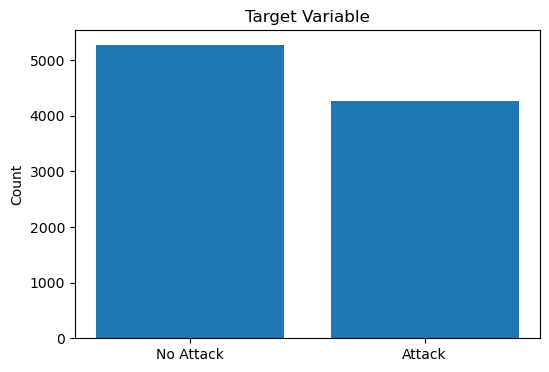

In [229]:
import matplotlib.pyplot as plt
class_counts = [len(y[y == 0]), len(y[y == 1])]
plt.figure(figsize=(6, 4))
plt.bar(['No Attack', 'Attack'], class_counts)
plt.title('Target Variable')
plt.ylabel('Count')
plt.show()

In [213]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Reshape 
inputs = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
inputs.shape

(9537, 9, 1)

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6675, 9, 1), (2862, 9, 1), (6675,), (2862,))

## CNN Model

In [215]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Dropout
from keras import optimizers
from keras import Model, Input
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

input_layer = Input(shape=(X_cnn.shape[1], 1))
x = Conv1D(32, 2, activation='relu')(input_layer)
x = MaxPooling1D(2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)   # Feature layer
output_layer = Dense(1, activation='sigmoid')(x)
cnn_model = Model(inputs=input_layer, outputs=output_layer)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "functional_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)          │ (None, 9, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_58 (Conv1D)                   │ (None, 8, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_57 (MaxPooling1D)      │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_27 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,417 (32.88 KB)

 Trainable params: 8,417 (32.88 KB)

 Non-trainable params: 0 (0.00 B)

In [216]:
# fit the model
history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=5)

Epoch 1/20
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7502 - loss: 0.5121 - val_accuracy: 0.8389 - val_loss: 0.4012
Epoch 2/20
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8518 - loss: 0.3832 - val_accuracy: 0.8564 - val_loss: 0.3677
Epoch 3/20
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8572 - loss: 0.3709 - val_accuracy: 0.8683 - val_loss: 0.3484
Epoch 4/20
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8714 - loss: 0.3336 - val_accuracy: 0.8613 - val_loss: 0.3610
Epoch 5/20
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8700 - loss: 0.3401 - val_accuracy: 0.8655 - val_loss: 0.3422
Epoch 6/20
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8703 - loss: 0.3303 - val_accuracy: 0.8739 - val_loss: 0.3296
Epoch 7/20
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8828 - loss: 0.3212 - val_accuracy: 0.8767 - val_loss: 0.3281
Epoch 8/20
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8813 - loss: 0.3130 - 

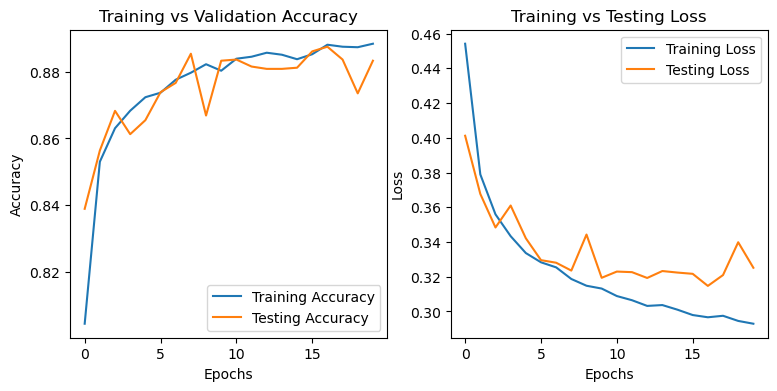

In [217]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training vs Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [218]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("==================== CNN Training Results=======================")
y_prob = cnn_model.predict(X_train)  # Shape: (n_samples,)
y_pred = (y_prob > 0.5).astype(int)
print("Classification Report:\n", classification_report(y_train, y_pred))
print("Confusion matrix:\n",confusion_matrix(y_train, y_pred))
cm1 = confusion_matrix(y_train, y_pred)
FPR = cm1[0,1]/(cm1[0,1]+cm1[0,0])
print('False PR : ', FPR)
FNR= cm1[1,0]/(cm1[1,1]+cm1[1,0])
print('False NR : ', FNR)

print("====================CNN Testing Results========================")
y_prob = cnn_model.predict(X_test)  # Shape: (n_samples,)
y_pred = (y_prob > 0.5).astype(int)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))
cm1 = confusion_matrix(y_test, y_pred)
FPR = cm1[0,1]/(cm1[0,1]+cm1[0,0])
print('False PR : ', FPR)
FNR= cm1[1,0]/(cm1[1,1]+cm1[1,0])
print('False NR : ', FNR)

==================== CNN Training Results=======================
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      3697
           1       0.97      0.78      0.86      2978

    accuracy                           0.89      6675
   macro avg       0.91      0.88      0.88      6675
weighted avg       0.90      0.89      0.89      6675

Confusion matrix:
 [[3613   84]
 [ 657 2321]]
False PR :  0.022721125236678387
False NR :  0.2206178643384822
====================CNN Testing Results========================
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1576
           1       0.96      0.77      0.86      1286

    accuracy                           0.88      2862
   macro avg       0.90      0.87      0.88      2862
weighted avg       0.89      0.88 

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


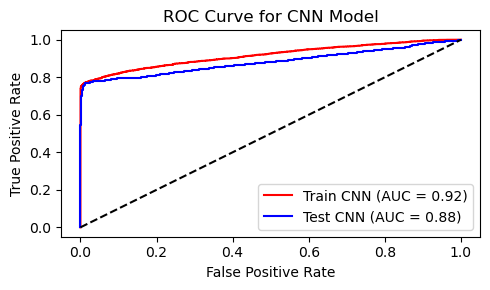

In [219]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_train = cnn_model.predict(X_train)
y_prob_test = cnn_model.predict(X_test)
fpr_cnn, tpr_cnn, _ = roc_curve(y_train, y_prob_train)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)
fpr_cnntest, tpr_cnntest, _ = roc_curve(y_test, y_prob_test)
roc_auc_cnntest = auc(fpr_cnntest, tpr_cnntest)

plt.figure(figsize=(5, 3))
plt.plot(fpr_cnn, tpr_cnn, color='red', label=f'Train CNN (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_cnntest, tpr_cnntest, color='blue', label=f'Test CNN (AUC = {roc_auc_cnntest:.2f})')
plt.plot([0, 1], [0, 1], color='black',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## Features extractor from CNN Model

In [221]:
feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)
train_features = feature_extractor.predict(X_train)
test_features = feature_extractor.predict(X_test)

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


## CNN+SVM Model

====================Training Results=======================
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      3697
           1       0.99      0.77      0.87      2978

    accuracy                           0.89      6675
   macro avg       0.92      0.88      0.89      6675
weighted avg       0.91      0.89      0.89      6675

Confusion matrix:
 [[3681   16]
 [ 695 2283]]
False PR :  0.004327833378414931
False NR :  0.2333781061114842
====================Testing Results========================
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1576
           1       0.99      0.76      0.86      1286

    accuracy                           0.89      2862
   macro avg       0.91      0.88      0.88      2862
weighted avg       0.90      0.89      0.89      2862

Confusion matrix:
 [[1563   13]
 [ 305  981]]
False PR :  0.00824873

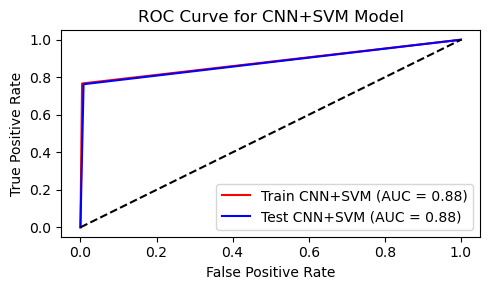

In [236]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(train_features,y_train)
SVMPred_train = SVM.predict(train_features)
print("====================Training Results=======================")
print("Classification Report:\n", classification_report(y_train, SVMPred_train))
cm1 = confusion_matrix(y_train, SVMPred_train)
print("Confusion matrix:\n",cm1)
FPR = cm1[0,1]/(cm1[0,1]+cm1[0,0])
print('False PR : ', FPR)
FNR= cm1[1,0]/(cm1[1,1]+cm1[1,0])
print('False NR : ', FNR)


print("====================Testing Results========================")
SVMPred_test = SVM.predict(test_features)
print("Classification Report:\n", classification_report(y_test, SVMPred_test))
cm1 = confusion_matrix(y_test, SVMPred_test)
print("Confusion matrix:\n",cm1)
FPR = cm1[0,1]/(cm1[0,1]+cm1[0,0])
print('False PR : ', FPR)
FNR= cm1[1,0]/(cm1[1,1]+cm1[1,0])
print('False NR : ', FNR)


y_prob_train = SVM.predict(train_features)
y_prob_test = SVM.predict(test_features)

fpr_SVM, tpr_SVM, _ = roc_curve(y_train, y_prob_train)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)

fpr_SVMtest, tpr_SVMtest, _ = roc_curve(y_test, y_prob_test)
roc_auc_SVMtest = auc(fpr_SVMtest, tpr_SVMtest)

plt.figure(figsize=(5, 3))
plt.plot(fpr_SVM, tpr_SVM, color='red', label=f'Train CNN+SVM (AUC = {roc_auc_SVM:.2f})')
plt.plot(fpr_SVMtest, tpr_SVMtest, color='blue', label=f'Test CNN+SVM (AUC = {roc_auc_SVMtest:.2f})')
plt.plot([0, 1], [0, 1], color='black',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN+SVM Model')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## CNN+RF Model

====================Training Results=======================
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3697
           1       1.00      1.00      1.00      2978

    accuracy                           1.00      6675
   macro avg       1.00      1.00      1.00      6675
weighted avg       1.00      1.00      1.00      6675

Confusion matrix:
 [[3697    0]
 [   0 2978]]
False PR :  0.0
False NR :  0.0
====================Testing Results========================
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1576
           1       0.95      0.77      0.86      1286

    accuracy                           0.88      2862
   macro avg       0.90      0.87      0.88      2862
weighted avg       0.89      0.88      0.88      2862

Confusion matrix:
 [[1529   47]
 [ 290  996]]
False PR :  0.02982233502538071
False NR :  0.22550544

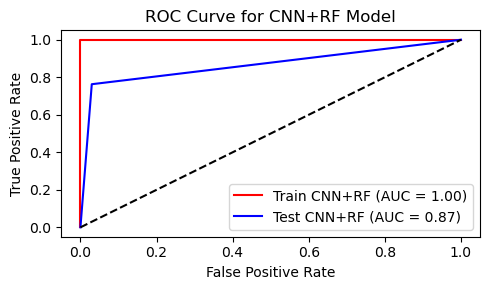

In [237]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(train_features,y_train)
RFPred_train = RF.predict(train_features)
print("====================Training Results=======================")
print("Classification Report:\n", classification_report(y_train, RFPred_train))
cm1 = confusion_matrix(y_train, RFPred_train)
print("Confusion matrix:\n",cm1)
FPR = cm1[0,1]/(cm1[0,1]+cm1[0,0])
print('False PR : ', FPR)
FNR= cm1[1,0]/(cm1[1,1]+cm1[1,0])
print('False NR : ', FNR)


print("====================Testing Results========================")
RFPred_test = RF.predict(test_features)
print("Classification Report:\n", classification_report(y_test, RFPred_test))
cm1 = confusion_matrix(y_test, RFPred_test)
print("Confusion matrix:\n",cm1)
FPR = cm1[0,1]/(cm1[0,1]+cm1[0,0])
print('False PR : ', FPR)
FNR= cm1[1,0]/(cm1[1,1]+cm1[1,0])
print('False NR : ', FNR)


y_prob_train = RF.predict(train_features)
y_prob_test = RF.predict(test_features)

fpr_RF, tpr_RF, _ = roc_curve(y_train, y_prob_train)
roc_auc_RF = auc(fpr_RF, tpr_RF)

fpr_RFtest, tpr_RFtest, _ = roc_curve(y_test, y_prob_test)
roc_auc_RFtest = auc(fpr_RFtest, tpr_RFtest)

plt.figure(figsize=(5, 3))
plt.plot(fpr_RF, tpr_RF, color='red', label=f'Train CNN+RF (AUC = {roc_auc_RF:.2f})')
plt.plot(fpr_RFtest, tpr_SVMtest, color='blue', label=f'Test CNN+RF (AUC = {roc_auc_RFtest:.2f})')
plt.plot([0, 1], [0, 1], color='black',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN+RF Model')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## CNN+KNN Model

====================Training Results=======================
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      3697
           1       0.97      0.79      0.87      2978

    accuracy                           0.89      6675
   macro avg       0.91      0.88      0.89      6675
weighted avg       0.91      0.89      0.89      6675

Confusion matrix:
 [[3631   66]
 [ 635 2343]]
False PR :  0.017852312685961592
False NR :  0.2132303559435863
====================Testing Results========================
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1576
           1       0.94      0.76      0.84      1286

    accuracy                           0.87      2862
   macro avg       0.88      0.86      0.86      2862
weighted avg       0.88      0.87      0.87      2862

Confusion matrix:
 [[1514   62]
 [ 312  974]]
False PR :  0.03934010

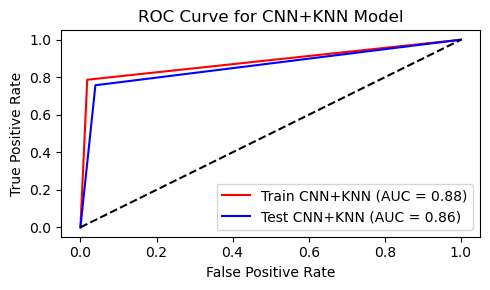

In [238]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()
KNN.fit(train_features,y_train)
KNNPred_train = KNN.predict(train_features)
print("====================Training Results=======================")
print("Classification Report:\n", classification_report(y_train, KNNPred_train))
cm1 = confusion_matrix(y_train, KNNPred_train)
print("Confusion matrix:\n",cm1)
FPR = cm1[0,1]/(cm1[0,1]+cm1[0,0])
print('False PR : ', FPR)
FNR= cm1[1,0]/(cm1[1,1]+cm1[1,0])
print('False NR : ', FNR)


print("====================Testing Results========================")
KNNPred_test = KNN.predict(test_features)
print("Classification Report:\n", classification_report(y_test, KNNPred_test))
cm1 = confusion_matrix(y_test, KNNPred_test)
print("Confusion matrix:\n",cm1)
FPR = cm1[0,1]/(cm1[0,1]+cm1[0,0])
print('False PR : ', FPR)
FNR= cm1[1,0]/(cm1[1,1]+cm1[1,0])
print('False NR : ', FNR)


y_prob_train = KNN.predict(train_features)
y_prob_test = KNN.predict(test_features)

fpr_KNN, tpr_KNN, _ = roc_curve(y_train, y_prob_train)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)

fpr_KNNtest, tpr_KNNtest, _ = roc_curve(y_test, y_prob_test)
roc_auc_KNNtest = auc(fpr_KNNtest, tpr_KNNtest)

plt.figure(figsize=(5, 3))
plt.plot(fpr_KNN, tpr_KNN, color='red', label=f'Train CNN+KNN (AUC = {roc_auc_KNN:.2f})')
plt.plot(fpr_KNNtest, tpr_KNNtest, color='blue', label=f'Test CNN+KNN (AUC = {roc_auc_KNNtest:.2f})')
plt.plot([0, 1], [0, 1], color='black',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN+KNN Model')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## CNN+GB Model

====================Training Results=======================
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      3697
           1       0.99      0.79      0.88      2978

    accuracy                           0.90      6675
   macro avg       0.92      0.89      0.90      6675
weighted avg       0.91      0.90      0.90      6675

Confusion matrix:
 [[3663   34]
 [ 626 2352]]
False PR :  0.009196645929131728
False NR :  0.2102081934184016
====================Testing Results========================
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90      1576
           1       0.97      0.77      0.86      1286

    accuracy                           0.89      2862
   macro avg       0.90      0.87      0.88      2862
weighted avg       0.90      0.89      0.88      2862

Confusion matrix:
 [[1542   34]
 [ 295  991]]
False PR :  0.02157360

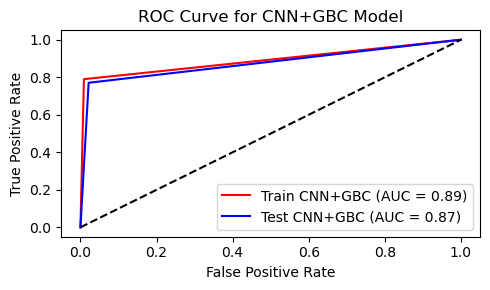

In [239]:
from sklearn.ensemble import GradientBoostingClassifier
gb =GradientBoostingClassifier()
gb.fit(train_features,y_train)
gbPred_train = gb.predict(train_features)
print("====================Training Results=======================")
print("Classification Report:\n", classification_report(y_train, gbPred_train))
cm1 = confusion_matrix(y_train, gbPred_train)
print("Confusion matrix:\n",cm1)
FPR = cm1[0,1]/(cm1[0,1]+cm1[0,0])
print('False PR : ', FPR)
FNR= cm1[1,0]/(cm1[1,1]+cm1[1,0])
print('False NR : ', FNR)

print("====================Testing Results========================")
gbPred_test = gb.predict(test_features)
print("Classification Report:\n", classification_report(y_test, gbPred_test))
cm1 = confusion_matrix(y_test, gbPred_test)
print("Confusion matrix:\n",cm1)
FPR = cm1[0,1]/(cm1[0,1]+cm1[0,0])
print('False PR : ', FPR)
FNR= cm1[1,0]/(cm1[1,1]+cm1[1,0])
print('False NR : ', FNR)


y_prob_train = gb.predict(train_features)
y_prob_test = gb.predict(test_features)

fpr_gb, tpr_gb, _ = roc_curve(y_train, y_prob_train)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_gbtest, tpr_gbtest, _ = roc_curve(y_test, y_prob_test)
roc_auc_gbtest = auc(fpr_gbtest, tpr_gbtest)

plt.figure(figsize=(5, 3))
plt.plot(fpr_gb, tpr_gb, color='red', label=f'Train CNN+GBC (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_gbtest, tpr_gbtest, color='blue', label=f'Test CNN+GBC (AUC = {roc_auc_gbtest:.2f})')
plt.plot([0, 1], [0, 1], color='black',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN+GBC Model')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()